<a href="https://colab.research.google.com/github/Harsh-58/DataScienceA2/blob/main/HarsJainU7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import arviz as az
import pymc as pm
import matplotlib.pyplot as plt

In [ ]:
!pip install git+https://github.com/pydata/xarray.git
import xarray as xr
!pip install bambi
import bambi as bmb

  Cloning https://github.com/pydata/xarray.git to /tmp/pip-req-build-mpo0pe4l
  Running command git clone --filter=blob:none --quiet https://github.com/pydata/xarray.git /tmp/pip-req-build-mpo0pe4l
  Resolved https://github.com/pydata/xarray.git to commit 4c2540de54af8d9da4456715d7dcac6b16f330d8
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


# Energy Demand vs. Temperature
In this project, I will analyze the relationship between daily electricity demand and maximum temperature in Victoria, Australia.

This data spans from January 1, 2015, to October 6, 2020.

I will also consider other factors in my models but I'm going to focus on the effect of temperature on energy demand first.

In [ ]:
import kagglehub
import os

# Download the dataset
path = kagglehub.dataset_download("aramacus/electricity-demand-in-victoria-australia")

# Print the path to confirm
print("Path to dataset files:", path)

# List the contents of the directory
dataset_files = os.listdir(path)
print("Files in the dataset directory:", dataset_files)

# Assuming the dataset contains a CSV file
csv_file_name = "complete_dataset.csv"  # Replace with the actual file name
csv_file_path = os.path.join(path, csv_file_name)

# Load the CSV file
Energy = pd.read_csv(csv_file_path)

# Display the first few rows of the dataset
Energy

100%|██████████| 67.7k/67.7k [00:00<00:00, 483kB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/aramacus/electricity-demand-in-victoria-australia/versions/2
Files in the dataset directory: ['complete_dataset.csv']


,date,demand,RRP,demand_pos_RRP,RRP_positive,demand_neg_RRP,RRP_negative,frac_at_neg_RRP,min_temperature,max_temperature,solar_exposure,rainfall,school_day,holiday
0,2015-01-01,99635.030,25.633696,97319.240,26.415953,2315.790,-7.240000,0.020833,13.3,26.9,23.6,0.0,N,Y
1,2015-01-02,129606.010,33.138988,121082.015,38.837661,8523.995,-47.809777,0.062500,15.4,38.8,26.8,0.0,N,N
2,2015-01-03,142300.540,34.564855,142300.540,34.564855,0.000,0.000000,0.000000,20.0,38.2,26.5,0.0,N,N
3,2015-01-04,104330.715,25.005560,104330.715,25.005560,0.000,0.000000,0.000000,16.3,21.4,25.2,4.2,N,N
4,2015-01-05,118132.200,26.724176,118132.200,26.724176,0.000,0.000000,0.000000,15.0,22.0,30.7,0.0,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2101,2020-10-02,99585.835,-6.076028,41988.240,26.980251,57597.595,-30.173823,0.625000,12.8,26.0,22.0,0.0,N,N
2102,2020-10-03,92277.025,-1.983471,44133.510,32.438156,48143.515,-33.538025,0.583333,17.4,29.4,19.8,0.0,N,N
2103,2020-10-04,94081.565,25.008614,88580.995,26.571687,5500.570,-0.163066,0.062500,13.5,29.5,8.4,0.0,N,N
2104,2020-10-05,113610.030,36.764701,106587.375,39.616015,7022.655,-6.511550,0.083333,9.1,12.7,7.3,12.8,N,N


I'm going to drop all the missing values from the dataset.

In [ ]:
print(Energy.isnull().sum())  # Shows the number of missing values per column
Energy = Energy.dropna()

date               0
demand             0
RRP                0
demand_pos_RRP     0
RRP_positive       0
demand_neg_RRP     0
RRP_negative       0
frac_at_neg_RRP    0
min_temperature    0
max_temperature    0
solar_exposure     0
rainfall           0
school_day         0
holiday            0
dtype: int64


I'm going to make a scatter matrix plot show the relationships between the many different variables.

array([[<Axes: xlabel='demand', ylabel='demand'>,
        <Axes: xlabel='RRP', ylabel='demand'>,
        <Axes: xlabel='demand_pos_RRP', ylabel='demand'>,
        <Axes: xlabel='RRP_positive', ylabel='demand'>,
        <Axes: xlabel='demand_neg_RRP', ylabel='demand'>,
        <Axes: xlabel='RRP_negative', ylabel='demand'>,
        <Axes: xlabel='frac_at_neg_RRP', ylabel='demand'>,
        <Axes: xlabel='min_temperature', ylabel='demand'>,
        <Axes: xlabel='max_temperature', ylabel='demand'>,
        <Axes: xlabel='solar_exposure', ylabel='demand'>,
        <Axes: xlabel='rainfall', ylabel='demand'>],
       [<Axes: xlabel='demand', ylabel='RRP'>,
        <Axes: xlabel='RRP', ylabel='RRP'>,
        <Axes: xlabel='demand_pos_RRP', ylabel='RRP'>,
        <Axes: xlabel='RRP_positive', ylabel='RRP'>,
        <Axes: xlabel='demand_neg_RRP', ylabel='RRP'>,
        <Axes: xlabel='RRP_negative', ylabel='RRP'>,
        <Axes: xlabel='frac_at_neg_RRP', ylabel='RRP'>,
        <Axes: xlabel='m

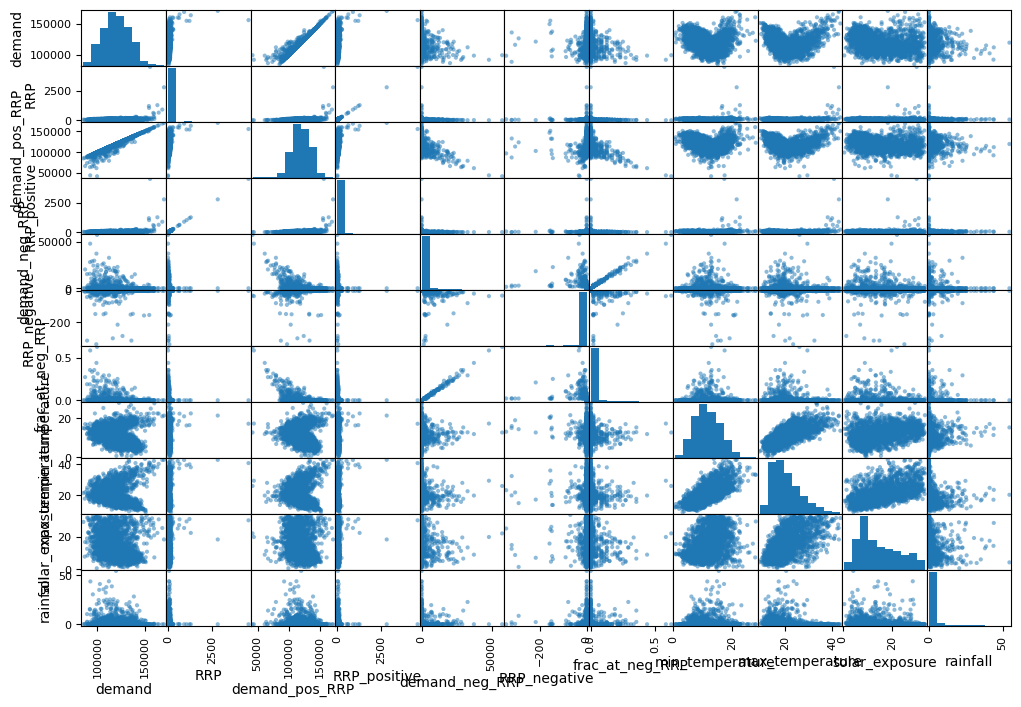

In [ ]:
pd.plotting.scatter_matrix(Energy, figsize=(12, 8))

I see a couple of different types of linear and polynomial trends but I want to focus on the relationship between Energy demand and temperature. To get a closer look I will create the scatter plot between energy demand and max temperature.

Definition of the variables:

**demand**: a total daily electricity demand in MWh

**max_temperature** : maximum temperature during the day in Celsius

<Axes: xlabel='max_temperature', ylabel='demand'>

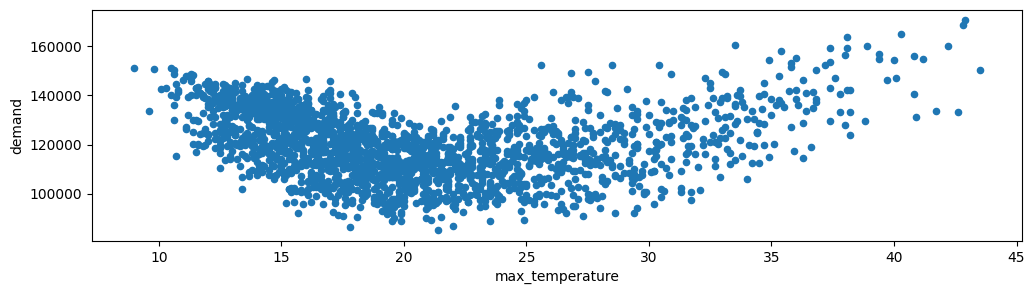

In [ ]:
Energy.plot(x="max_temperature", y="demand", figsize=(12, 3), kind="scatter")

This looks like a polynomial relationship. I kind of knew this would be the case since extreme temperatures require more energy for heating and cooling.

Therefore I'm going to be using polynomial regression models. A polynomial regression model is a type of regression analysis where the relationship between an x and y variable is modeled using a polynomial function which allows for the capture of non-linear relationships between the variables which is present in these 2 variables.

## Why Polynomial Regression Over Other Models?
**Gaussian Processes (GP):** While GP models can capture complex relationships, they are computationally expensive, especially with large datasets like the one in my energy demand project. GP models also require careful tuning of kernel functions, making them less practical for this analysis where efficiency and interpretability are important.

**B-Splines:** B-splines are useful for handling piecewise relationships in data, but they require selecting the right number of knots. With my energy demand dataset, the relationships between variables are not strictly piecewise, so B-splines would not offer any clear advantage and might complicate the interpretation of the results.

**Polynomial Regression:** Polynomial regression is a great choice for predicting energy demand in this case. It efficiently captures the non-linear relationships between predictors like temperature, solar exposure, and school days. The polynomial model offers simplicity, interpretability, and efficiency, which are essential for handling a medium-sized dataset. Unlike more complex models, polynomial regression allows us to easily interpret how changes in these variables influence demand, making it the best choice for this type of analysis.

In [ ]:
  # Baseline model (Degree 1 - Linear)
  model_poly_1 = bmb.Model("`demand` ~ `max_temperature`", Energy) # Use backticks instead of Q()
  idata_poly_1 = model_poly_1.fit()

Output()

In [ ]:
# Polynomial model (Degree 2)
model_poly_2 = bmb.Model("`demand` ~ poly(`max_temperature`, degree=2)", Energy)
idata_poly_2 = model_poly_2.fit()

Output()

In [ ]:
# Polynomial model (Degree 3)
model_poly_3 = bmb.Model("`demand` ~ poly(`max_temperature`, degree=3)", Energy)
idata_poly_3 = model_poly_3.fit()

Output()

In [ ]:
# Polynomial model (Degree 4)
model_poly_4 = bmb.Model("`demand` ~ poly(`max_temperature`, degree=4)", Energy)
idata_poly_4 = model_poly_4.fit()

Output()

In [ ]:
# Polynomial model (Degree 7)
model_poly_7 = bmb.Model("`demand` ~ poly(`max_temperature`, degree=7)", Energy)
idata_poly_7 = model_poly_7.fit()

Output()

/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


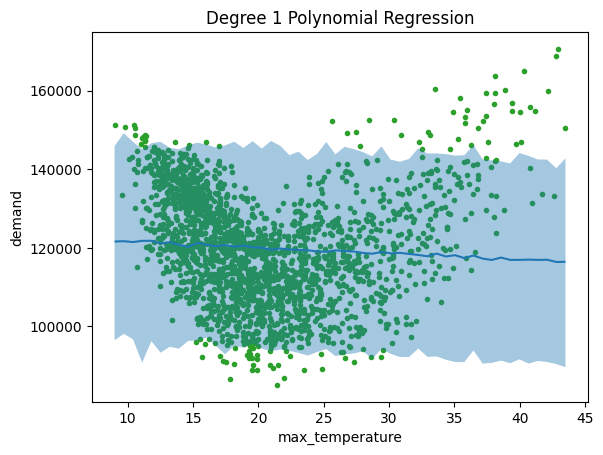

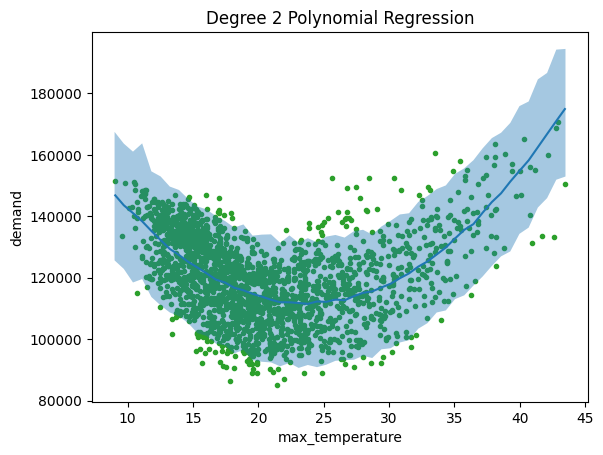

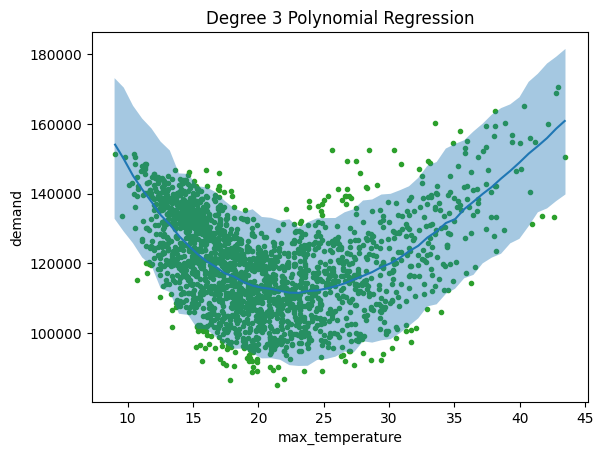

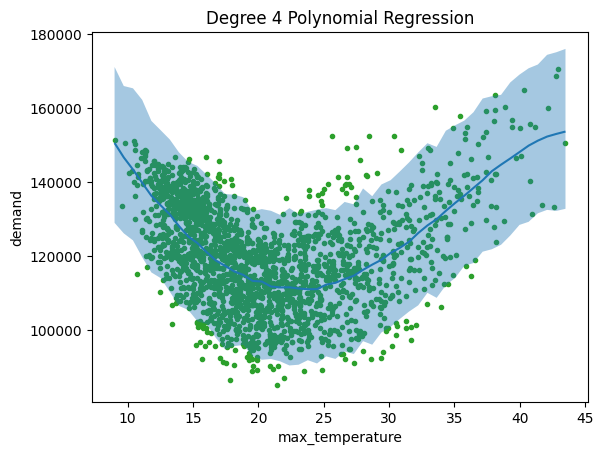

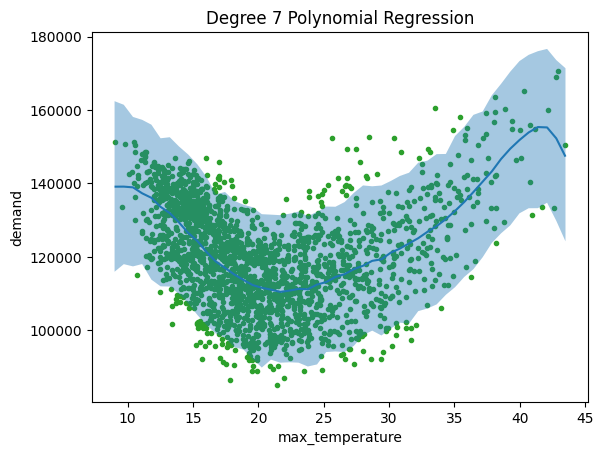

In [ ]:
# Plot results
bmb.interpret.plot_predictions(model_poly_1, idata_poly_1, "max_temperature", pps=True)
plt.plot(Energy['max_temperature'], Energy['demand'], "C2.", zorder=-3)
plt.title("Degree 1 Polynomial Regression")

bmb.interpret.plot_predictions(model_poly_2, idata_poly_2, "max_temperature", pps=True)
plt.plot(Energy['max_temperature'], Energy['demand'], "C2.", zorder=-3)
plt.title("Degree 2 Polynomial Regression")

bmb.interpret.plot_predictions(model_poly_3, idata_poly_3, "max_temperature", pps=True)
plt.plot(Energy['max_temperature'], Energy['demand'], "C2.", zorder=-3)
plt.title("Degree 3 Polynomial Regression")

bmb.interpret.plot_predictions(model_poly_4, idata_poly_4, "max_temperature", pps=True)
plt.plot(Energy['max_temperature'], Energy['demand'], "C2.", zorder=-3)
plt.title("Degree 4 Polynomial Regression")

bmb.interpret.plot_predictions(model_poly_7, idata_poly_7, "max_temperature", pps=True)
plt.plot(Energy['max_temperature'], Energy['demand'], "C2.", zorder=-3)
plt.title("Degree 7 Polynomial Regression")

plt.show()


**Degree 1 Polynomial** (Linear Regression): This model fails to capture the complexity of the data, oversimplifying the relationship between temperature and energy demand. The assumption of a strictly linear trend leads to large residuals, indicating a poor fit.

**Degree 2 and 3 Polynomial**: These models account for some curvature in the data, revealing a noticeable dip and adapting better to non-linearity. While they reduce residuals in certain areas, they still require refinement.

**Degree 4 and 7 Polynomial**: These models fit the data much more closely, capturing finer variations in energy demand. However, they also introduce significant oscillations at the edges, raising concerns about potential overfitting. Since both appear to be strong candidates, model comparison will be used to determine the better fit.

In [ ]:
# Fit models with log_likelihood=True
idata_poly_1 = model_poly_1.fit(idata_kwargs={"log_likelihood":True})
idata_poly_2 = model_poly_2.fit(idata_kwargs={"log_likelihood":True})
idata_poly_3 = model_poly_3.fit(idata_kwargs={"log_likelihood":True})
idata_poly_4 = model_poly_4.fit(idata_kwargs={"log_likelihood":True})
idata_poly_7 = model_poly_7.fit(idata_kwargs={"log_likelihood":True})

Output()

Output()

Output()

Output()

Output()

I'm going to use ELPD-LOO to compare my models because it provides a strong measure of predictive accuracy while penalizing complexity. This approach helps balance fit and complexity, which prevents overfitting by favoring models that capture true patterns rather than noise. By using ELPD-LOO, I can objectively determine which polynomial degree offers the best trade-off between accuracy and generalizability.

          rank      elpd_loo      p_loo   elpd_diff        weight         se  \
Degree 7     0 -22516.723982  10.000194    0.000000  8.015076e-01  30.016517   
Degree 4     1 -22522.775435   6.164613    6.051454  1.284513e-01  30.099361   
Degree 3     2 -22524.795810   5.221952    8.071828  1.969838e-11  29.924221   
Degree 2     3 -22541.196598   4.370116   24.472617  7.004113e-02  30.856215   
Degree 1     4 -23009.176097   3.946554  492.452115  0.000000e+00  31.560866   

                dse  warning scale  
Degree 7   0.000000    False   log  
Degree 4   4.446171    False   log  
Degree 3   4.694669    False   log  
Degree 2   8.429075    False   log  
Degree 1  30.218822    False   log  


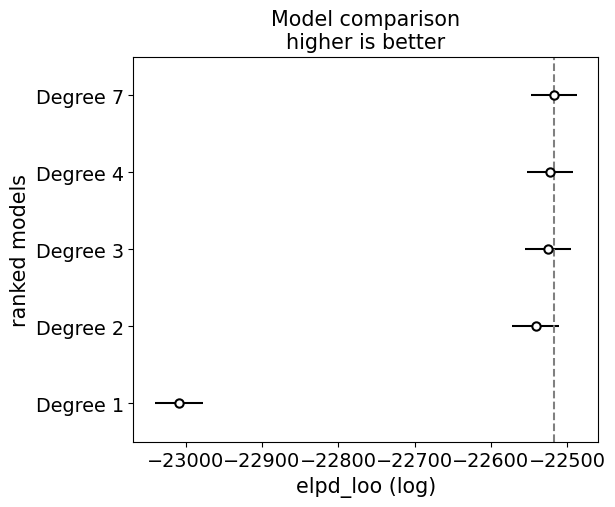

In [ ]:
# Perform model comparison using ELPD-LOO
compare = az.compare(
    {
        "Degree 1": idata_poly_1,
        "Degree 2": idata_poly_2,
        "Degree 3": idata_poly_3,
        "Degree 4": idata_poly_4,
        "Degree 7": idata_poly_7
    },
    #method="loo"
)

# Print and visualize comparison
print(compare)
az.plot_compare(compare)
plt.show()

I'm going to create an interactions model to capture the relationships between multiple factors that influence energy demand. Since energy consumption is not driven by a single variable, but rather by the interplay of temperature, sunlight, and human activity (like school days), the interaction terms allow the model to better reflect how these variables work together to impact demand.

Temperature is a primary driver of energy demand, especially for heating and cooling.

Solar exposure represents the availability of sunlight, which can reduce demand for artificial lighting and cooling.

School days affect energy patterns due to changes in daily routines and energy usage behaviors.

By including interactions between these variables, the model can better account for how combinations of factors influence energy demand in more nuanced ways, offering a more accurate representation of real-world energy consumption patterns.

In [ ]:
# Define the Bayesian regression model with interaction terms
model_interactions = bmb.Model(
    "demand ~ max_temperature + solar_exposure + school_day + "
    "max_temperature * solar_exposure + max_temperature * school_day + solar_exposure * school_day",
    data=Energy
).fit(idata_kwargs={"log_likelihood": True})


Output()

I'm going to make another model with additional interactions that might improve the model.
**bold text**
**Interaction Terms Explained:**

max_temperature * solar_exposure: Interaction between temperature and solar exposure on energy demand.

max_temperature * school_day: How temperature affects demand on school days.

max_temperature * holiday: The effect of temperature on energy demand during holidays.

max_temperature * rainfall: How temperature interacts with rainfall to affect energy consumption.

solar_exposure * school_day: Solar exposure's effect on demand on school days.

solar_exposure * holiday: Impact of solar exposure on demand during holidays.

solar_exposure * rainfall: The relationship between solar exposure and rainfall and how they jointly affect energy demand.

min_temperature * RRP: How low temperatures interact with the price of electricity in influencing energy demand.

In [ ]:
extended_interactions = bmb.Model(
    "demand ~ max_temperature + solar_exposure + school_day + holiday + rainfall + min_temperature + RRP + "
    "max_temperature * solar_exposure + max_temperature * school_day + max_temperature * holiday + "
    "max_temperature * rainfall + solar_exposure * school_day + solar_exposure * holiday + "
    "solar_exposure * rainfall + min_temperature * RRP",
    data=Energy
).fit(idata_kwargs={"log_likelihood": True})

Output()

/usr/local/lib/python3.11/dist-packages/arviz/stats/stats.py:795: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.70 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(


                       rank      elpd_loo      p_loo   elpd_diff  \
Degree 7                  0 -22516.723982  10.000194    0.000000   
Degree 4                  1 -22522.775435   6.164613    6.051454   
Degree 3                  2 -22524.795810   5.221952    8.071828   
Extended Interactions     3 -22537.165781  30.524048   20.441800   
Degree 2                  4 -22541.196598   4.370116   24.472617   
Key Interactions          5 -22626.698326   9.905288  109.974345   
Degree 1                  6 -23009.176097   3.946554  492.452115   

                             weight         se        dse  warning scale  
Degree 7               4.904485e-01  30.016517   0.000000    False   log  
Degree 4               1.629814e-08  30.099361   4.446171    False   log  
Degree 3               1.641556e-08  29.924221   4.694669    False   log  
Extended Interactions  5.095514e-01  37.439584  32.866252     True   log  
Degree 2               1.640072e-08  30.856215   8.429075    False   log  
Key I

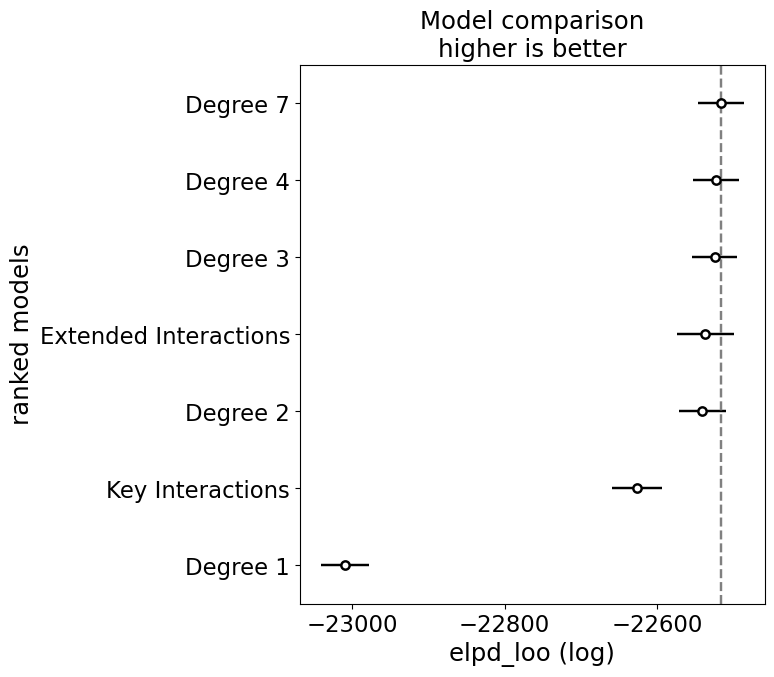

In [ ]:
# Perform model comparison using ELPD-LOO
compare = az.compare(
    {
        "Degree 1": idata_poly_1,
        "Degree 2": idata_poly_2,
        "Degree 3": idata_poly_3,
        "Degree 4": idata_poly_4,
        "Degree 7": idata_poly_7,
        "Key Interactions": model_interactions,
        "Extended Interactions": extended_interactions,

    },
    #method="loo"
)

# Print and visualize comparison
print(compare)
az.plot_compare(compare)
plt.show()

# **Winner: Degree 7 Polynomial Model**
The key interactions model and extended interactions model, while designed to account for the complex relationships between temperature, solar exposure, and school days, did not perform as well as the higher-degree polynomial models, particularly the degree 7 model. Despite its ability to model interaction effects, it struggled to capture the data properly and introduced unnecessary complexity in the form of overfitting.

In contrast, the degree 7 polynomial model provided a better fit to the data. It was able to capture the non-linear relationships between the variables, especially the more subtle fluctuations in demand, while maintaining a balance. The degree 7 model struck the right balance by capturing both the curvature of the data and the underlying trends without overfitting to noise, which is why I choose it as the best model for predicting energy demand. This just shows that the main factor for energy demand is the temperature.

This showed me that even though interaction terms can be useful for understanding the relationships between variables, in this case, the degree 7 polynomial model proved to be more effective at modeling the underlying patterns in the data without unnecessary complexity.